In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_settting

from functions import Spectral

exact: [-0.          1.96349541  3.92699082  5.89048623  7.85398163]
approximated: [3.47425769e-15 7.85268977e-01 1.56976299e+00 2.35270783e+00
 3.13333084e+00 3.91086163e+00 3.92634488e+00 4.68453286e+00
 5.45358103e+00 6.21724718e+00]


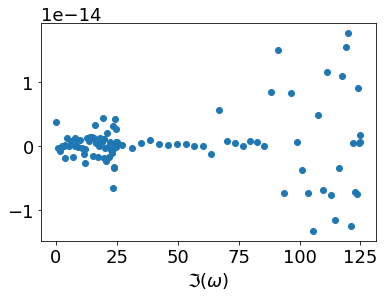

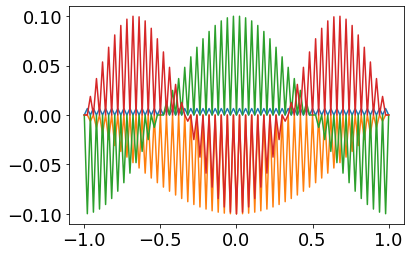

In [7]:
N = 101
spectral = Spectral(N,"symmetric","FD")
x = spectral.x
D = spectral.D1

v0 = 1.5
n0 = 1

A = 1j*np.block([[-(v0*D)[1:-1,1:-1], -(n0*D)[1:-1,1:-1]],[-(D/n0)[1:-1,1:-1], -(v0*D)[1:-1,1:-1]]])
omega,V = np.linalg.eig(A)
V = V[:int(V.shape[0]/2), :]
V = np.pad(V, ((1,1),(0,0)))

V = V[:,omega.real > 0]
omega = omega[omega.real > 0]
ind = np.argsort(omega)
omega = omega[ind]
V = V[:,ind]

print("exact:",-np.arange(5)*np.pi*(1-v0**2)/2)
print("approximated:",omega.real[:10])

plt.plot(omega.real, omega.imag, 'o')
plt.xlabel("$\Re(\omega)$")
plt.xlabel("$\Im(\omega)$")

plt.figure()
for i in range(4):
    plt.plot(x, V[:,i].real)

exact: [-0.          1.96349541  3.92699082  5.89048623  7.85398163]
approximated: [0.46484164 0.61817326 0.99641125 1.70347257 2.12008566 2.79854155
 3.23826363 3.89010125 4.04242121 4.34976788]


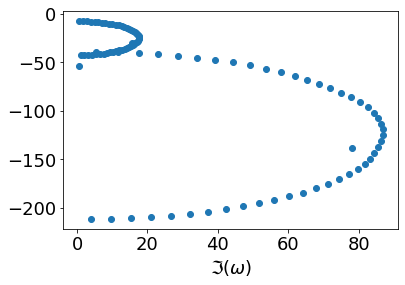

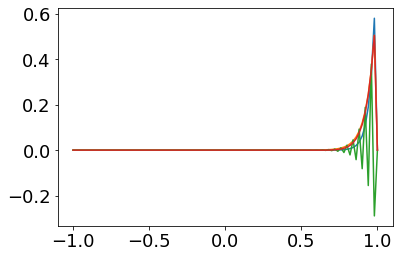

In [10]:
N = 101
spectral = Spectral(N,"symmetric","FD")
x = spectral.x
# D = (np.diag(-np.ones(N),k=0) + np.diag(np.ones(N-1),k=1)) / (x[1]-x[0])
D = (np.diag(np.ones(N),k=0) + np.diag(-np.ones(N-1),k=-1)) / (x[1]-x[0])

v0 = 1.5
n0 = 1

A = 1j*np.block([[-(v0*D)[1:-1,1:-1], -(n0*D)[1:-1,1:-1]],[-(D/n0)[1:-1,1:-1], -(v0*D)[1:-1,1:-1]]])
omega,V = np.linalg.eig(A)
V = V[:int(V.shape[0]/2), :]
V = np.pad(V, ((1,1),(0,0)))

V = V[:,omega.real > 0]
omega = omega[omega.real > 0]
ind = np.argsort(omega)
omega = omega[ind]
V = V[:,ind]

print("exact:",-np.arange(5)*np.pi*(1-v0**2)/2)
print("approximated:",omega.real[:10])

plt.plot(omega.real, omega.imag, 'o')
plt.xlabel("$\Re(\omega)$")
plt.xlabel("$\Im(\omega)$")

plt.figure()
for i in range(4):
    plt.plot(x, V[:,i].real)